In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


df = pd.read_csv("../data/parkinsons.csv")

df.columns = df.columns.str.strip()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nDescriptive stats (numeric):")
display(df.describe().T)


p_parkinsons = (df['status'] == 1).mean()
p_healthy    = (df['status'] == 0).mean()
print("\nP(Parkinson's) =", round(p_parkinsons, 3))
print("P(Healthy) =", round(p_healthy, 3))

Shape: (195, 24)
Columns: ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Descriptive stats (numeric):


,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000



P(Parkinson's) = 0.754
P(Healthy) = 0.246


In [3]:
jitter = df['MDVP:Jitter(%)']

thresholds = {
    "Q1": jitter.quantile(0.25),
    "Median": jitter.median(),
    "Q3": jitter.quantile(0.75),
}

for label, t in thresholds.items():
    mask_high = jitter > t
    mask_low  = ~mask_high

    p_high = ((df['status'] == 1) & mask_high).sum() / mask_high.sum()
    p_low  = ((df['status'] == 1) & mask_low).sum() / mask_low.sum()
    p_joint = ((df['status'] == 1) & mask_high).sum() / len(df)

    print(f"\n{label} threshold = {t:.4f}")
    print(f"  P(Parkinson's | jitter > t) = {p_high:.3f}")
    print(f"  P(Parkinson's | jitter ≤ t) = {p_low:.3f}")
    print(f"  P(Parkinson's ∩ jitter > t) = {p_joint:.3f}")





Q1 threshold = 0.0035
  P(Parkinson's | jitter > t) = 0.848
  P(Parkinson's | jitter ≤ t) = 0.480
  P(Parkinson's ∩ jitter > t) = 0.631

Median threshold = 0.0049
  P(Parkinson's | jitter > t) = 0.897
  P(Parkinson's | jitter ≤ t) = 0.612
  P(Parkinson's ∩ jitter > t) = 0.446

Q3 threshold = 0.0074
  P(Parkinson's | jitter > t) = 0.939
  P(Parkinson's | jitter ≤ t) = 0.692
  P(Parkinson's ∩ jitter > t) = 0.236


In [4]:
jitter = df['MDVP:Jitter(%)']
threshold = jitter.quantile(0.75)
print("Q3 threshold:", threshold)

mask = jitter > threshold

p_conditional = ((df['status'] == 1) & mask).sum() / mask.sum()
p_joint       = ((df['status'] == 1) & mask).sum() / len(df)

print("P(Parkinson's | jitter > Q3) =", round(p_conditional, 3))
print("P(Parkinson's ∩ jitter > Q3) =", round(p_joint, 3))

prob_table = pd.DataFrame({
    "Threshold (Q3)": [threshold],
    "P_conditional":  [p_conditional],
    "P_joint":        [p_joint],
})
display(prob_table)


Q3 threshold: 0.007365
P(Parkinson's | jitter > Q3) = 0.939
P(Parkinson's ∩ jitter > Q3) = 0.236


,Threshold (Q3),P_conditional,P_joint
0,0.007365,0.938776,0.235897


Mean: 0.006220461538461538
Median: 0.00494
Std Dev: 0.00484813369260256
Variance: 2.3504400301348134e-05
IQR: 0.003905


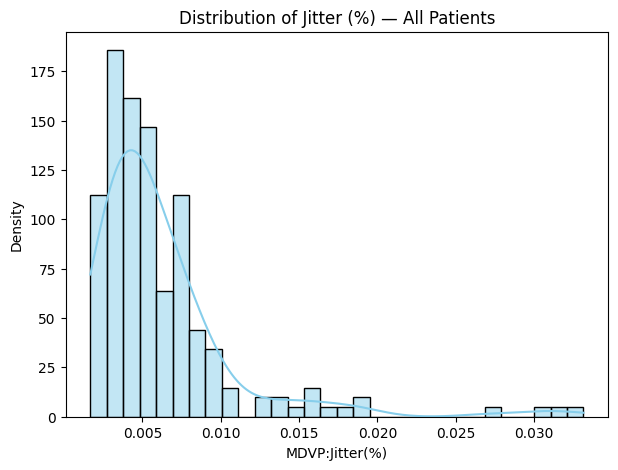

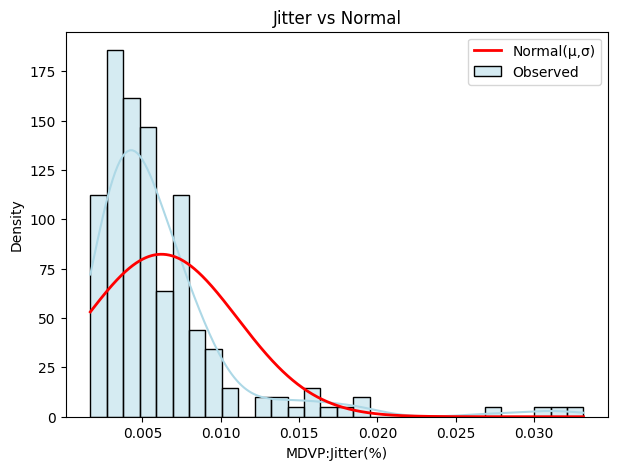

In [5]:
print("Mean:", jitter.mean())
print("Median:", jitter.median())
print("Std Dev:", jitter.std())
print("Variance:", jitter.var())
print("IQR:", jitter.quantile(0.75) - jitter.quantile(0.25))

# Histogram + KDE
plt.figure(figsize=(7,5))
sns.histplot(jitter, bins=30, kde=True, stat="density", color="skyblue")
plt.title("Distribution of Jitter (%) — All Patients")
plt.xlabel("MDVP:Jitter(%)"); plt.ylabel("Density")
plt.show()

# Overlay with Normal
mean, std = jitter.mean(), jitter.std()
x = np.linspace(jitter.min(), jitter.max(), 1000)
y = norm.pdf(x, mean, std)

plt.figure(figsize=(7,5))
sns.histplot(jitter, bins=30, kde=True, stat="density", color="lightblue", label="Observed")
plt.plot(x, y, "r-", lw=2, label="Normal(μ,σ)")
plt.title("Jitter vs Normal")
plt.xlabel("MDVP:Jitter(%)"); plt.ylabel("Density")
plt.legend(); plt.show()



--- MDVP:Jitter(%) ---
Mean = 0.0062, Std = 0.0048, Median = 0.0049
Variance = 0.0000, IQR = 0.0039


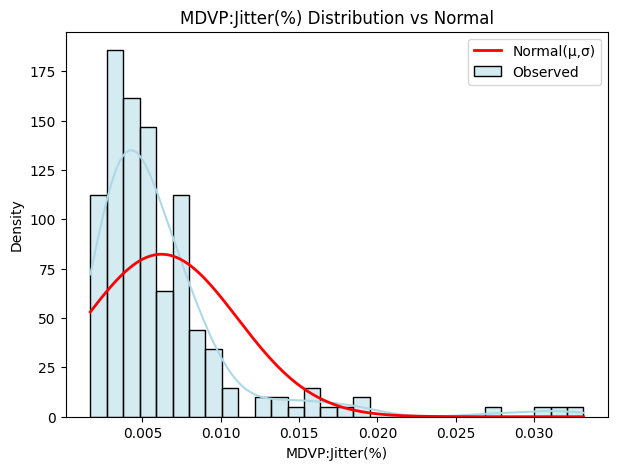

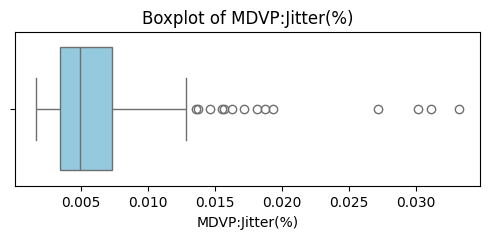

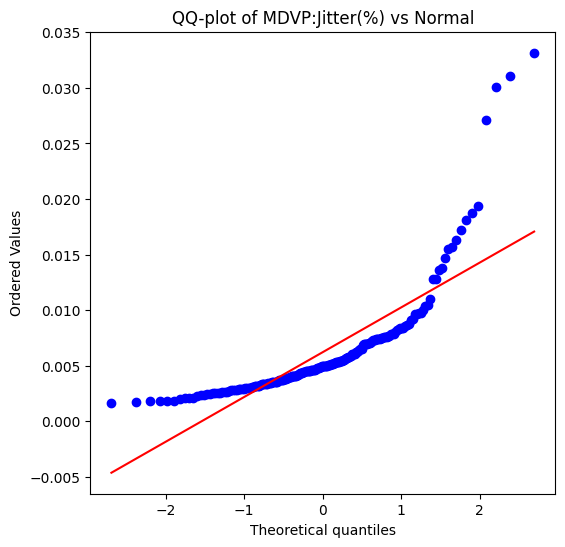


--- MDVP:Shimmer ---
Mean = 0.0297, Std = 0.0189, Median = 0.0230
Variance = 0.0004, IQR = 0.0214


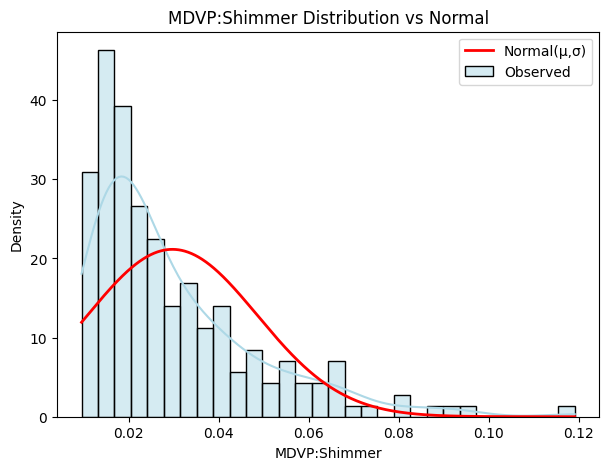

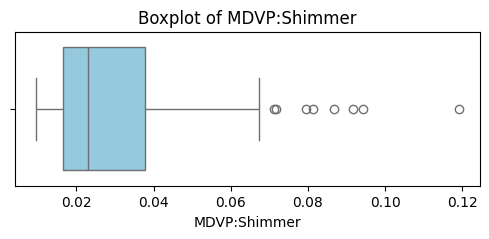

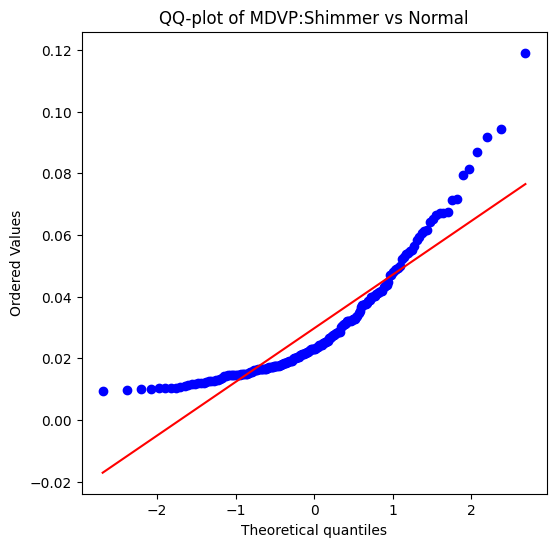


--- HNR ---
Mean = 21.8860, Std = 4.4258, Median = 22.0850
Variance = 19.5874, IQR = 5.8775


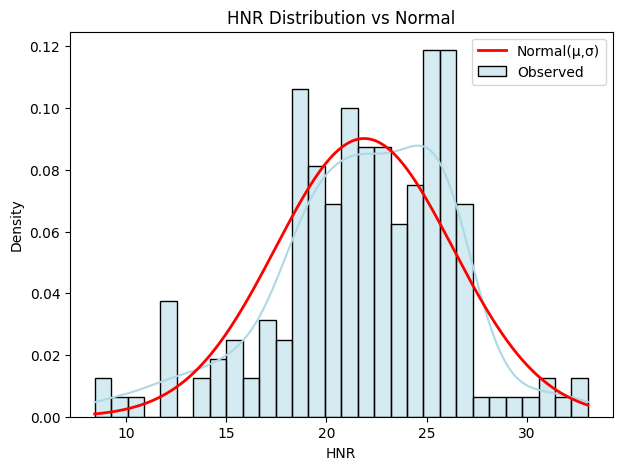

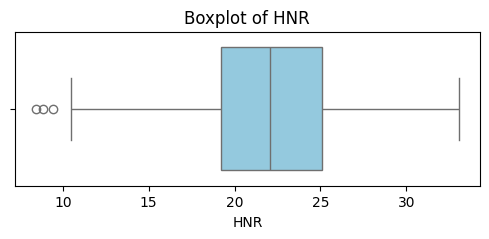

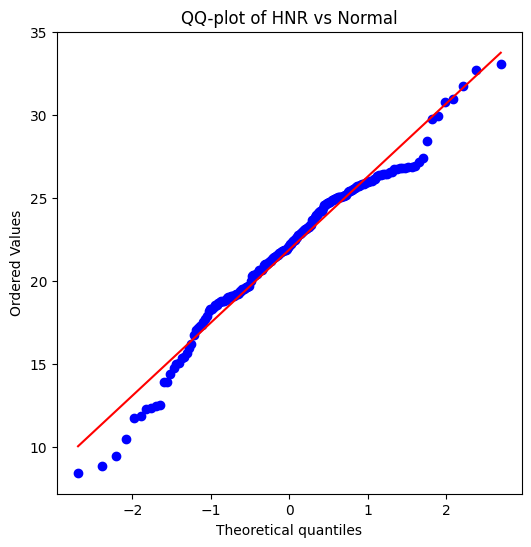

In [6]:
def explore_distribution(df, colname, bins=30):
    """Explore distribution of a single feature vs Normal."""
    values = df[colname]
    mean, std = values.mean(), values.std()

    print(f"\n--- {colname} ---")
    print(f"Mean = {mean:.4f}, Std = {std:.4f}, Median = {values.median():.4f}")
    print(f"Variance = {values.var():.4f}, IQR = {(values.quantile(0.75)-values.quantile(0.25)):.4f}")

    # Normal curve
    x = np.linspace(values.min(), values.max(), 1000)
    y = norm.pdf(x, mean, std)

    # Plot 1: Histogram + KDE + Normal
    plt.figure(figsize=(7,5))
    sns.histplot(values, bins=bins, kde=True, stat="density", color="lightblue", label="Observed")
    plt.plot(x, y, "r-", lw=2, label="Normal(μ,σ)")
    plt.title(f"{colname} Distribution vs Normal")
    plt.xlabel(colname); plt.ylabel("Density")
    plt.legend(); plt.show()

    # Plot 2: Boxplot
    plt.figure(figsize=(6,2))
    sns.boxplot(x=values, color="skyblue")
    plt.title(f"Boxplot of {colname}")
    plt.show()

    # Plot 3: QQ-plot
    plt.figure(figsize=(6,6))
    stats.probplot(values, dist="norm", plot=plt)
    plt.title(f"QQ-plot of {colname} vs Normal")
    plt.show()

# Use it:
explore_distribution(df, 'MDVP:Jitter(%)')
explore_distribution(df, 'MDVP:Shimmer')
explore_distribution(df, 'HNR')



In [7]:
#to statistically test whether those impressions hold.

from scipy.stats import shapiro, levene

normality = {}
variances = {}

num_cols = df.select_dtypes(include="number").columns.tolist()
if "status" in num_cols:
    num_cols.remove("status")

for col in num_cols:
    x = df.loc[df["status"]==0, col].dropna()
    y = df.loc[df["status"]==1, col].dropna()
    
    # Shapiro-Wilk normality (p>0.05 means approx. normal)
    p_shapiro_x = shapiro(x)[1]
    p_shapiro_y = shapiro(y)[1]
    
    # Levene’s test for equal variance (p>0.05 means equal variance)
    p_levene = levene(x, y)[1]
    
    normality[col] = (p_shapiro_x > 0.05, p_shapiro_y > 0.05)
    variances[col] = (p_levene > 0.05)


for col in ["MDVP:Jitter(%)", "MDVP:Shimmer", "HNR"]:
    print(f"{col}: Normal? {normality[col]}, Equal var? {variances[col]}")



MDVP:Jitter(%): Normal? (np.False_, np.False_), Equal var? False
MDVP:Shimmer: Normal? (np.False_, np.False_), Equal var? False
HNR: Normal? (np.False_, np.False_), Equal var? False


In [8]:

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, skew
from statsmodels.stats.multitest import multipletests

def rank_biserial_from_u(u_stat, n1, n2):
    denom = n1 * n2
    return np.nan if denom == 0 else 1 - 2 * (u_stat / denom)

def safe_log1p(s):
    # works for >= -1; our features are positive so it's fine
    return np.log1p(s)

# numeric cols 
num_cols = df.select_dtypes(include="number").columns.tolist()
if "status" in num_cols:
    num_cols.remove("status")

rows = []
for col in num_cols:
    x_raw = df.loc[df.status==0, col].dropna()
    y_raw = df.loc[df.status==1, col].dropna()

    # Shapiro
    p_shap_x = shapiro(x_raw)[1] if len(x_raw)>=3 else np.nan
    p_shap_y = shapiro(y_raw)[1] if len(y_raw)>=3 else np.nan
    p_lev_raw = levene(x_raw, y_raw)[1] if (len(x_raw)>=2 and len(y_raw)>=2) else np.nan

    # Try log1p if data strictly positive
    can_log = (x_raw.min() > -1) and (y_raw.min() > -1)
    if can_log:
        x_log = safe_log1p(x_raw)
        y_log = safe_log1p(y_raw)
        p_shap_x_log = shapiro(x_log)[1] if len(x_log)>=3 else np.nan
        p_shap_y_log = shapiro(y_log)[1] if len(y_log)>=3 else np.nan
        p_lev_log = levene(x_log, y_log)[1] if (len(x_log)>=2 and len(y_log)>=2) else np.nan
    else:
        x_log = y_log = None
        p_shap_x_log = p_shap_y_log = p_lev_log = np.nan

    # --- choose test ---
    # preference: if raw both normal (p>0.05), use t-test (Welch if Levene p<=0.05)
    # else if log both normal, use t-test on log (Welch if needed)
    # else use Mann–Whitney (on raw)
    def both_normal(px, py): 
        return (px is not np.nan) and (py is not np.nan) and (px > 0.05) and (py > 0.05)

    chosen = None
    p_val = np.nan
    effect = np.nan
    note = ""

    if both_normal(p_shap_x, p_shap_y):
        # parametric on raw
        equal_var = (p_lev_raw > 0.05) if not np.isnan(p_lev_raw) else False
        stat, p_val = ttest_ind(x_raw, y_raw, equal_var=equal_var)
        chosen = f"{'Student' if equal_var else 'Welch'} t-test (raw)"
        # simple effect size proxy: difference in means
        effect = x_raw.mean() - y_raw.mean()
        note = f"Levene p={p_lev_raw:.3g}"
    elif both_normal(p_shap_x_log, p_shap_y_log):
        # parametric on log
        equal_var_log = (p_lev_log > 0.05) if not np.isnan(p_lev_log) else False
        stat, p_val = ttest_ind(x_log, y_log, equal_var=equal_var_log)
        chosen = f"{'Student' if equal_var_log else 'Welch'} t-test (log1p)"
        effect = x_log.mean() - y_log.mean()
        note = f"Levene(log) p={p_lev_log:.3g}"
    else:
        # non-parametric on raw
        try:
            u_stat, p_val = mannwhitneyu(x_raw, y_raw, alternative="two-sided")
        except TypeError:
            u_stat, p_val = mannwhitneyu(x_raw, y_raw)  # old SciPy fallback
        chosen = "Mann–Whitney U (raw)"
        effect = rank_biserial_from_u(u_stat, len(x_raw), len(y_raw))
        note = "non-normal by Shapiro"

    rows.append({
        "feature": col,
        "n_healthy": len(x_raw), "n_pd": len(y_raw),
        "skew_overall": skew(df[col], nan_policy="omit"),
        "Shapiro_x": p_shap_x, "Shapiro_y": p_shap_y,
        "Levene_raw": p_lev_raw,
        "Shapiro_x_log": p_shap_x_log, "Shapiro_y_log": p_shap_y_log,
        "Levene_log": p_lev_log,
        "chosen_test": chosen,
        "p_value": p_val,
        "effect": effect,
        "note": note,
    })

res = pd.DataFrame(rows)

# FDR adjust
rej, pfdr, _, _ = multipletests(res["p_value"], alpha=0.05, method="fdr_bh")
res["p_fdr"] = pfdr
res["sig_FDR_0.05"] = rej

# Order by evidence
res = res.sort_values(["p_fdr", "p_value"]).reset_index(drop=True)

display(res.head(15))


,feature,n_healthy,n_pd,skew_overall,Shapiro_x,Shapiro_y,Levene_raw,Shapiro_x_log,Shapiro_y_log,Levene_log,chosen_test,p_value,effect,note,p_fdr,sig_FDR_0.05
0,spread1,48,147,0.428808,3.711945e-01,8.602544e-03,1.175454e-02,NaN,NaN,NaN,Mann–Whitney U (raw),1.592799e-16,0.793934,non-normal by Shapiro,1.752079e-15,True
1,PPE,48,147,0.791343,3.026882e-02,4.947477e-05,3.834687e-04,6.702983e-02,9.884465e-04,1.097930e-03,Mann–Whitney U (raw),1.592799e-16,0.793934,non-normal by Shapiro,1.752079e-15,True
2,MDVP:APQ,48,147,2.597864,1.466337e-02,7.646177e-13,1.377980e-05,1.658557e-02,2.181110e-12,9.821964e-06,Mann–Whitney U (raw),1.269268e-11,0.651786,non-normal by Shapiro,9.307968e-11,True
3,spread2,48,147,0.143317,6.399754e-01,5.202595e-01,6.305783e-02,4.211576e-01,6.960109e-01,1.804927e-01,Student t-test (raw),2.391729e-11,-0.087841,Levene p=0.0631,1.315451e-10,True
4,MDVP:Jitter(Abs),48,147,2.628650,3.003215e-06,6.023380e-14,1.099281e-02,3.003845e-06,6.035869e-14,1.099231e-02,Mann–Whitney U (raw),1.275739e-09,0.577948,non-normal by Shapiro,5.613253e-09,True
5,MDVP:PPQ,48,147,3.050196,1.770953e-06,7.178390e-16,3.116325e-03,1.810793e-06,8.154540e-16,3.060577e-03,Mann–Whitney U (raw),2.401494e-09,0.574405,non-normal by Shapiro,8.805477e-09,True
6,MDVP:Shimmer(dB),48,147,1.983976,1.121275e-04,4.797812e-11,6.078164e-06,7.050878e-04,2.355481e-08,1.024897e-06,Mann–Whitney U (raw),3.143455e-09,0.570153,non-normal by Shapiro,9.879429e-09,True
7,MDVP:Shimmer,48,147,1.653634,3.516657e-04,2.606962e-09,3.499528e-07,4.431655e-04,5.757059e-09,2.567495e-07,Mann–Whitney U (raw),4.224740e-09,0.565476,non-normal by Shapiro,1.161804e-08,True
8,MDVP:Jitter(%),48,147,3.061165,3.117443e-07,4.352378e-16,1.088658e-02,3.364135e-07,5.453079e-16,1.070274e-02,Mann–Whitney U (raw),7.897927e-09,0.555414,non-normal by Shapiro,1.737874e-08,True
9,Jitter:DDP,48,147,3.336141,1.014088e-07,9.145676e-17,5.194147e-03,1.086394e-07,1.362562e-16,4.901903e-03,Mann–Whitney U (raw),8.180063e-09,0.554847,non-normal by Shapiro,1.737874e-08,True


In [9]:
# add an absolute effect-size column for nicer sorting/display. on’t accidentally filter out features just because they had a negative direction.
res["effect_size_abs"] = res["effect"].abs()

# top 5 by adjusted p-value (tie-break by larger effect)
top_feats = res.sort_values(["p_fdr","effect_size_abs"], ascending=[True, False]).head(5)
print(top_feats[["feature","p_fdr","effect","effect_size_abs","chosen_test"]])

features_for_step3 = top_feats["feature"].tolist()
features_for_step3




            feature         p_fdr    effect  effect_size_abs  \
0           spread1  1.752079e-15  0.793934         0.793934   
1               PPE  1.752079e-15  0.793934         0.793934   
2          MDVP:APQ  9.307968e-11  0.651786         0.651786   
3           spread2  1.315451e-10 -0.087841         0.087841   
4  MDVP:Jitter(Abs)  5.613253e-09  0.577948         0.577948   

            chosen_test  
0  Mann–Whitney U (raw)  
1  Mann–Whitney U (raw)  
2  Mann–Whitney U (raw)  
3  Student t-test (raw)  
4  Mann–Whitney U (raw)  


['spread1', 'PPE', 'MDVP:APQ', 'spread2', 'MDVP:Jitter(Abs)']

In [15]:

import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from sklearn.utils import resample

# --- Effect size helper ---
def rank_biserial_from_u(u_stat, n1, n2):
    return 1 - 2 * (u_stat / (n1 * n2))

# --- Bootstrap CI helper ---
def bootstrap_ci(data, n_boot=2000, ci=95, func=np.median):
    boot_samples = [func(resample(data)) for _ in range(n_boot)]
    lower = np.percentile(boot_samples, (100-ci)/2)
    upper = np.percentile(boot_samples, 100-(100-ci)/2)
    return lower, upper

# --- Features to analyze ---
features = ["spread1", "PPE", "MDVP:APQ", "MDVP:Jitter(Abs)"]

results_step3 = []

for feat in features:
    x = df.loc[df["status"]==0, feat].dropna()  # Healthy
    y = df.loc[df["status"]==1, feat].dropna()  # PD

    # Descriptives
    med_0, med_1 = x.median(), y.median()
    ci_0 = bootstrap_ci(x)
    ci_1 = bootstrap_ci(y)

    # Mann–Whitney test
    u_stat, p_val = mannwhitneyu(x, y, alternative="two-sided")

    # Effect size
    r_rb = rank_biserial_from_u(u_stat, len(x), len(y))

    results_step3.append({
        "feature": feat,
        "median_healthy": med_0,
        "CI_healthy": ci_0,
        "median_PD": med_1,
        "CI_PD": ci_1,
        "p_value": p_val,
        "rank_biserial": r_rb,
        "effect_size_abs": abs(r_rb)
    })



    print(f"\n🔹 {feat}")
    print(f"  Healthy median = {med_0:.4f} (95% CI {ci_0[0]:.4f}–{ci_0[1]:.4f})")
    print(f"  PD median      = {med_1:.4f} (95% CI {ci_1[0]:.4f}–{ci_1[1]:.4f})")
    print(f"  Mann–Whitney U: p = {p_val:.3e}")
    print(f"  Effect size (rank-biserial) = {r_rb:.3f}")
    if p_val < 0.05:
        print("  Significant difference between groups.")
    else:
        print("  No significant difference.")

# Collect into DataFrame for easy viewing
results_step3 = pd.DataFrame(results_step3)

def categorize_rank_biserial(r):
    if pd.isna(r): return np.nan
    a = abs(r)
    if a < 0.1:  return "small"
    if a < 0.3:  return "medium"
    if a < 0.5:  return "large-ish"
    return "large"

results_step3_rounded = results_step3.copy()
results_step3_rounded["median_healthy"] = results_step3_rounded["median_healthy"].round(4)
results_step3_rounded["median_PD"] = results_step3_rounded["median_PD"].round(4)
results_step3_rounded["p_value"] = results_step3_rounded["p_value"].apply(lambda x: f"{x:.2e}")
results_step3_rounded["rank_biserial"] = results_step3_rounded["rank_biserial"].round(3)
results_step3_rounded["effect_size_abs"] = results_step3_rounded["effect_size_abs"].round(3)
results_step3_rounded = results_step3_rounded.copy()
results_step3_rounded["effect_magnitude_rb"] = results_step3_rounded["rank_biserial"].apply(categorize_rank_biserial)

display(results_step3_rounded)



🔹 spread1
  Healthy median = -6.8264 (95% CI -7.0579–-6.6505)
  PD median      = -5.4400 (95% CI -5.5853–-5.3131)
  Mann–Whitney U: p = 1.593e-16
  Effect size (rank-biserial) = 0.794
  Significant difference between groups.

🔹 PPE
  Healthy median = 0.1151 (95% CI 0.1000–0.1289)
  PD median      = 0.2227 (95% CI 0.2118–0.2327)
  Mann–Whitney U: p = 1.593e-16
  Effect size (rank-biserial) = 0.794
  Significant difference between groups.

🔹 MDVP:APQ
  Healthy median = 0.0130 (95% CI 0.0115–0.0139)
  PD median      = 0.0216 (95% CI 0.0195–0.0257)
  Mann–Whitney U: p = 1.269e-11
  Effect size (rank-biserial) = 0.652
  Significant difference between groups.

🔹 MDVP:Jitter(Abs)
  Healthy median = 0.0000 (95% CI 0.0000–0.0000)
  PD median      = 0.0000 (95% CI 0.0000–0.0001)
  Mann–Whitney U: p = 1.276e-09
  Effect size (rank-biserial) = 0.578
  Significant difference between groups.


,feature,median_healthy,CI_healthy,median_PD,CI_PD,p_value,rank_biserial,effect_size_abs,effect_magnitude_rb
0,spread1,-6.8264,"(-7.057869, -6.650471)",-5.4400,"(-5.585259, -5.313059025000002)",1.59e-16,0.794,0.794,large
1,PPE,0.1151,"(0.1000355, 0.128872)",0.2227,"(0.211756, 0.232744)",1.59e-16,0.794,0.794,large
2,MDVP:APQ,0.0130,"(0.01149, 0.013885624999999999)",0.0216,"(0.01948, 0.025717999999999956)",1.27e-11,0.652,0.652,large
3,MDVP:Jitter(Abs),0.0000,"(1e-05, 3e-05)",0.0000,"(4e-05, 5e-05)",1.28e-09,0.578,0.578,large


/tmp/ipykernel_5086/3276119744.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_5086/3276119744.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_5086/3276119744.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_5086/3276119744.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


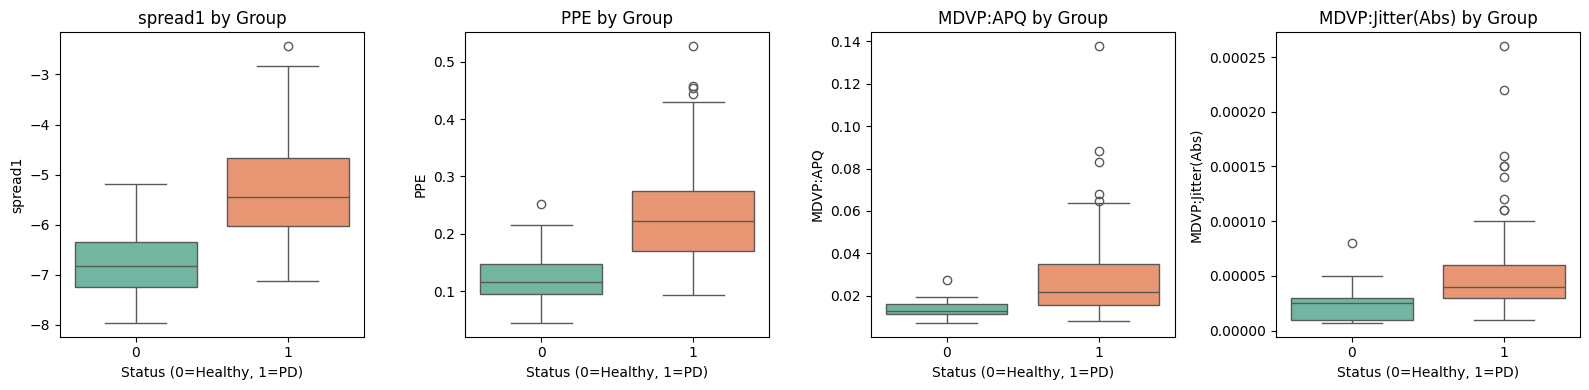

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["spread1", "PPE", "MDVP:APQ", "MDVP:Jitter(Abs)"]

fig, axes = plt.subplots(1, len(features), figsize=(16, 4))

for i, feat in enumerate(features):
    sns.boxplot(
        data=df,
        x="status", y=feat,
        ax=axes[i],
        palette="Set2"
    )
    axes[i].set_title(f"{feat} by Group")
    axes[i].set_xlabel("Status (0=Healthy, 1=PD)")
    axes[i].set_ylabel(feat)

plt.tight_layout()
plt.show()


In [12]:
from statsmodels.stats.power import TTestIndPower

# Example: Power analysis for PPE (Healthy vs PD)
x = df.loc[df["status"]==0, "PPE"].dropna()
y = df.loc[df["status"]==1, "PPE"].dropna()

# Compute Cohen's d (standardized mean difference)
mean_diff = y.mean() - x.mean()
pooled_std = np.sqrt(((x.std()**2) + (y.std()**2)) / 2)
cohens_d = mean_diff / pooled_std

print(f"Cohen's d for PPE = {cohens_d:.3f}")

# Power analysis
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=cohens_d, alpha=0.05, power=0.8, alternative='two-sided')
print(f"Required sample size per group for 80% power = {sample_size:.0f}")


Cohen's d for PPE = 1.642
Required sample size per group for 80% power = 7


Cohen’s d = 1.64

This is well above 0.8, which is the conventional threshold for a large effect.

In practical terms: the difference in PPE between PD patients and healthy controls is huge and highly consistent.

It means that if you randomly picked one PD patient and one healthy subject, there’s a very high probability the PD patient would have a higher PPE score.

Required sample size per group for 80% power ≈ 7

This means that even with very small studies (just 7 people per group), the PPE difference is strong enough to be detected reliably with 80% chance, assuming α = 0.05.

Most clinical studies need far more participants — here the signal is so strong that even tiny cohorts pick it up.

Implication for research/biomedicine

PPE is not just statistically significant; it is also practically significant.

This supports its role as a robust biomarker of dysphonia in Parkinson’s disease.

However, real-world use would still require larger samples to account for patient heterogeneity, comorbidities, and recording variability.

In [ ]:
from statsmodels.stats.power import TTestIndPower

features = ["spread1", "PPE", "MDVP:APQ", "MDVP:Jitter(Abs)"]

analysis = TTestIndPower()
rows = []

for feat in features:
    x = df.loc[df["status"]==0, feat].dropna()  
    y = df.loc[df["status"]==1, feat].dropna()  
    
    # Cohen's d
    mean_diff = y.mean() - x.mean()
    pooled_std = np.sqrt(((x.std()**2) + (y.std()**2)) / 2)
    cohens_d = mean_diff / pooled_std
    
    # Required sample size for 80% power
    sample_size = analysis.solve_power(effect_size=cohens_d, alpha=0.05, power=0.8, alternative="two-sided")
    
    rows.append({
        "feature": feat,
        "Cohen_d": round(cohens_d, 3),
        "required_n_per_group": int(np.ceil(sample_size))
    })
    
    print(f"\n🔹 {feat}")
    print(f"  Cohen's d = {cohens_d:.3f} → ", end="")
    if abs(cohens_d) < 0.2:
        print("small effect")
    elif abs(cohens_d) < 0.5:
        print("medium effect")
    elif abs(cohens_d) < 0.8:
        print("large effect")
    else:
        print("very large effect")
    
    print(f"  Required sample size per group for 80% power = {sample_size:.0f}")

power_results = pd.DataFrame(rows)
display(power_results)



🔹 spread1
  Cohen's d = 1.732 → very large effect
  Required sample size per group for 80% power = 6

🔹 PPE
  Cohen's d = 1.642 → very large effect
  Required sample size per group for 80% power = 7

🔹 MDVP:APQ
  Cohen's d = 1.095 → very large effect
  Required sample size per group for 80% power = 14

🔹 MDVP:Jitter(Abs)
  Cohen's d = 0.972 → very large effect
  Required sample size per group for 80% power = 18


,feature,Cohen_d,required_n_per_group
0,spread1,1.732,7
1,PPE,1.642,7
2,MDVP:APQ,1.095,15
3,MDVP:Jitter(Abs),0.972,18


In [17]:
step3_keep = ["feature","median_healthy","median_PD","p_value","rank_biserial","effect_size_abs","effect_magnitude_rb"]
final_summary = results_step3_rounded[step3_keep].merge(power_results, on="feature", how="left")

final_summary = final_summary[[
    "feature",
    "median_healthy","median_PD",
    "p_value",
    "rank_biserial","effect_magnitude_rb",
    "Cohen_d",
    "required_n_per_group"
]]

display(final_summary)
final_summary.to_csv("summary.csv", index=False)


,feature,median_healthy,median_PD,p_value,rank_biserial,effect_magnitude_rb,Cohen_d,required_n_per_group
0,spread1,-6.8264,-5.4400,1.59e-16,0.794,large,1.732,7
1,PPE,0.1151,0.2227,1.59e-16,0.794,large,1.642,7
2,MDVP:APQ,0.0130,0.0216,1.27e-11,0.652,large,1.095,15
3,MDVP:Jitter(Abs),0.0000,0.0000,1.28e-09,0.578,large,0.972,18


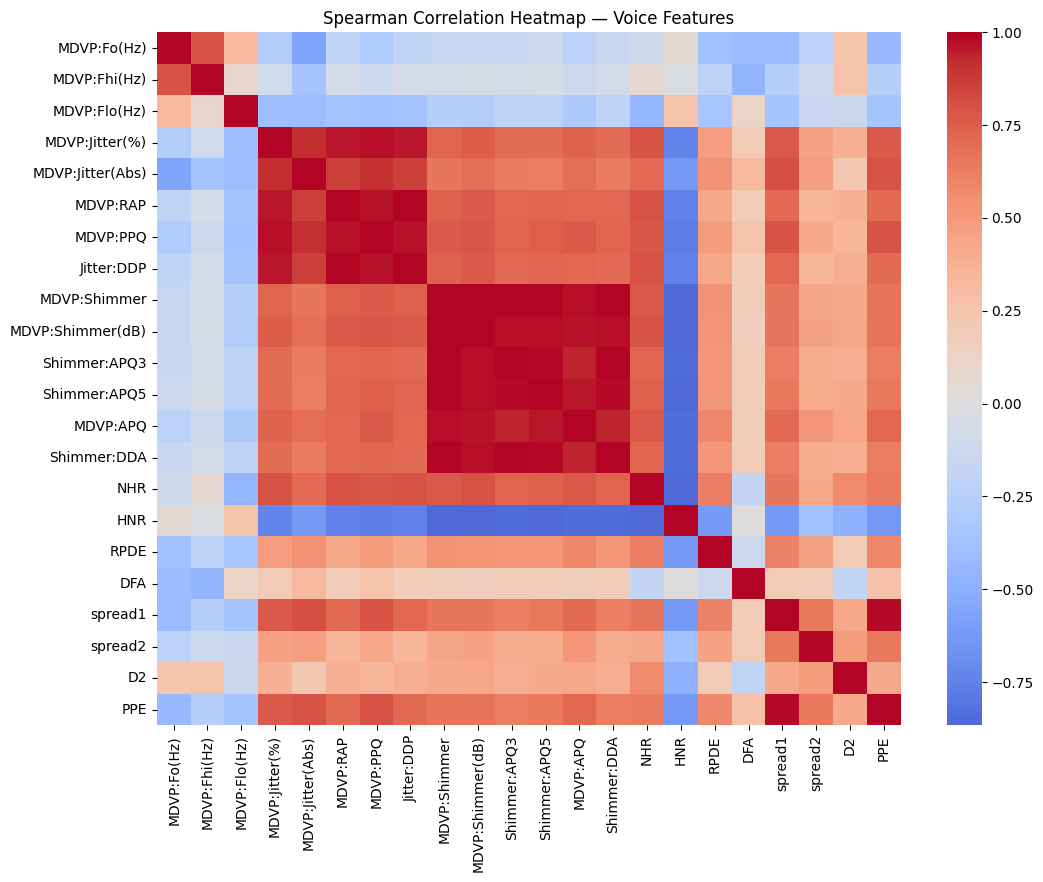


Top 15 strongest feature-feature correlations:


,feature1,feature2,spearman_r,abs_r
0,Shimmer:APQ3,Shimmer:DDA,0.999998,0.999998
1,MDVP:RAP,Jitter:DDP,0.999980,0.999980
2,MDVP:Shimmer,MDVP:Shimmer(dB),0.993185,0.993185
3,MDVP:Shimmer,Shimmer:APQ3,0.988902,0.988902
4,MDVP:Shimmer,Shimmer:DDA,0.988869,0.988869
5,MDVP:Shimmer,Shimmer:APQ5,0.987025,0.987025
6,spread1,PPE,0.978760,0.978760
7,Shimmer:APQ3,Shimmer:APQ5,0.978270,0.978270
8,Shimmer:APQ5,Shimmer:DDA,0.978261,0.978261
9,MDVP:Shimmer(dB),Shimmer:APQ5,0.976381,0.976381


In [24]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import spearmanr
from itertools import combinations


# numeric columns (exclude label)
num_cols = df.select_dtypes(include="number").columns.tolist()
if "status" in num_cols:
    num_cols.remove("status")
# --- Spearman correlation matrix (robust for skewed features) ---
corr_spear = df[num_cols].corr(method="spearman")

# Heatmap (visual overview)
plt.figure(figsize=(12,9))
sns.heatmap(corr_spear, cmap="coolwarm", center=0, square=False)
plt.title("Spearman Correlation Heatmap — Voice Features")
plt.show()

# --- Flatten the matrix into a table ---
pairs = []
for f1, f2 in combinations(num_cols, 2):
    r = corr_spear.loc[f1, f2]
    pairs.append({"feature1": f1, "feature2": f2, "spearman_r": r})

corr_pairs = pd.DataFrame(pairs)

# Sort by absolute correlation (highest first)
corr_pairs["abs_r"] = corr_pairs["spearman_r"].abs()
corr_pairs = corr_pairs.sort_values("abs_r", ascending=False).reset_index(drop=True)

# Display top 15 pairs for readability
print("\nTop 15 strongest feature-feature correlations:")
display(corr_pairs.head(15))
corr_pairs.to_csv("feature_feature_correlations.csv", index=False)





=== Simple regression: spread1 ~ PPE ===
                            OLS Regression Results                            
Dep. Variable:                spread1   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2425.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          3.13e-111
Time:                        14:26:24   Log-Likelihood:                -38.802
No. Observations:                 195   AIC:                             81.60
Df Residuals:                     193   BIC:                             88.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

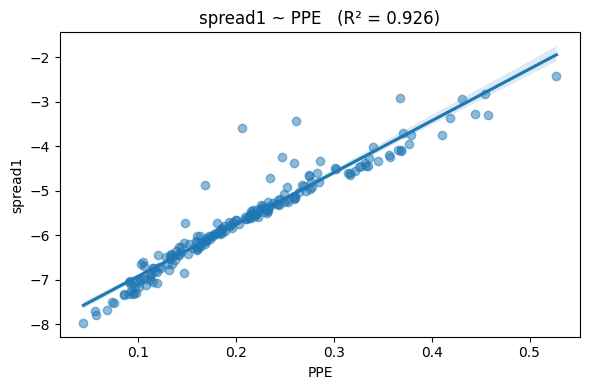


=== Simple regression: MDVP:Shimmer(dB) ~ MDVP:APQ ===
                            OLS Regression Results                            
Dep. Variable:       MDVP:Shimmer(dB)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2329.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):          1.15e-109
Time:                        14:26:25   Log-Likelihood:                 293.30
No. Observations:                 195   AIC:                            -582.6
Df Residuals:                     193   BIC:                            -576.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

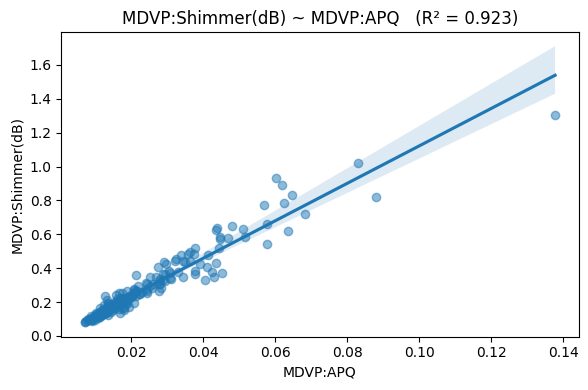

In [27]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Example 1: spread1 ~ PPE
f1, f2 = "spread1", "PPE"
data_ = df[[f1, f2]].dropna()

X = sm.add_constant(data_[f2])  # predictor
y = data_[f1]                   # target

ols = sm.OLS(y, X).fit()
print(f"\n=== Simple regression: {f1} ~ {f2} ===")
print(ols.summary())

plt.figure(figsize=(6,4))
sns.regplot(data=data_, x=f2, y=f1, scatter_kws={"alpha":0.5})
plt.title(f"{f1} ~ {f2}   (R² = {ols.rsquared:.3f})")
plt.tight_layout()
plt.show()

# Example 2: Shimmer(dB) ~ APQ
f1, f2 = "MDVP:Shimmer(dB)", "MDVP:APQ"
data_ = df[[f1, f2]].dropna()

X = sm.add_constant(data_[f2])
y = data_[f1]

ols = sm.OLS(y, X).fit()
print(f"\n=== Simple regression: {f1} ~ {f2} ===")
print(ols.summary())

plt.figure(figsize=(6,4))
sns.regplot(data=data_, x=f2, y=f1, scatter_kws={"alpha":0.5})
plt.title(f"{f1} ~ {f2}   (R² = {ols.rsquared:.3f})")
plt.tight_layout()
plt.show()



Top 12 features by |Spearman r| vs status:


,feature,spearman_r_vs_status,p_value
0,PPE,0.592373,7.407018e-20
1,spread1,0.592373,7.407018e-20
2,MDVP:APQ,0.486314,5.698463e-13
3,spread2,0.468020,5.239355e-12
4,MDVP:Jitter(Abs),0.435938,1.891420e-10
5,MDVP:PPQ,0.428585,4.087470e-10
6,MDVP:Shimmer(dB),0.425419,5.663495e-10
7,MDVP:Shimmer,0.421917,8.092234e-10
8,MDVP:Jitter(%),0.414412,1.714840e-09
9,Jitter:DDP,0.413987,1.788332e-09



Selected predictors with low mutual correlation: ['PPE', 'MDVP:APQ', 'spread2', 'MDVP:Jitter(%)', 'NHR']

Current VIFs:


,feature,VIF
0,const,9.879927
1,PPE,3.925127
2,MDVP:APQ,2.922862
3,spread2,1.833510
4,MDVP:Jitter(%),9.913850
5,NHR,6.754380



Final predictors after VIF pruning: ['PPE', 'MDVP:APQ', 'spread2', 'MDVP:Jitter(%)', 'NHR']
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  195
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                            5
Date:                Fri, 26 Sep 2025   Pseudo R-squ.:                  0.4500
Time:                        14:45:50   Log-Likelihood:                -59.856
converged:                       True   LL-Null:                       -108.82
Covariance Type:            nonrobust   LLR p-value:                 1.440e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.5518      1.037     -5.352      0.000      -7.585      -3.519
PPE               26.0377 

,feature,odds_ratio,CI_low,CI_high,p_value
const,const,3.900000e-03,0.0005,2.960000e-02,0.0000
PPE,PPE,2.032498e+11,407713.7708,1.013222e+17,0.0001
MDVP:APQ,MDVP:APQ,1.043587e+47,7512.5946,1.449664e+90,0.0327
spread2,spread2,2.744626e+03,1.0868,6.931559e+06,0.0476
MDVP:Jitter(%),MDVP:Jitter(%),0.000000e+00,0.0000,5.101859e+93,0.3246
NHR,NHR,7.240000e-02,0.0000,7.702209e+19,0.9153



Holdout AUC (25% test) = 0.939


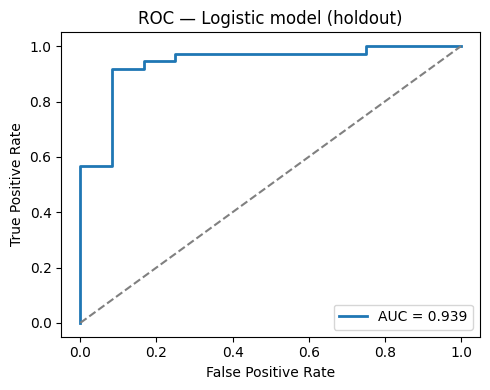

In [29]:
# ===== Step 5C — Logistic regression with collinearity control (research-style) =====
import numpy as np, pandas as pd, statsmodels.api as sm
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Prep: numeric features and a Spearman correlation matrix (robust to skew)
num_cols = df.select_dtypes(include="number").columns.tolist()
if "status" in num_cols:
    num_cols.remove("status")

corr_spear = df[num_cols].corr(method="spearman")

# 1) Rank features by |Spearman r| with status (association strength)
rows = []
for c in num_cols:
    r, p = spearmanr(df[c], df["status"])
    rows.append({"feature": c, "spearman_r_vs_status": r, "p_value": p})
corr_vs_status = pd.DataFrame(rows).sort_values("spearman_r_vs_status", key=np.abs, ascending=False).reset_index(drop=True)

print("Top 12 features by |Spearman r| vs status:")
display(corr_vs_status.head(12))

# 2) Greedy selection: take top features while avoiding high inter-correlation (|r| > threshold)
selected = []
threshold = 0.80   # typical collinearity guardrail (use 0.7–0.85 as you prefer)

for feat in corr_vs_status["feature"]:
    if len(selected) == 0:
        selected.append(feat)
        continue
    ok = True
    for s in selected:
        if abs(corr_spear.loc[feat, s]) > threshold:
            ok = False
            break
    if ok:
        selected.append(feat)
    if len(selected) >= 5:   # keep model compact/readable; adjust if needed
        break

print(f"\nSelected predictors with low mutual correlation: {selected}")

# (Optional) Manually override with domain favorites:
# selected = ["spread1", "PPE", "MDVP:APQ", "MDVP:Jitter(Abs)"]

# 3) VIF pruning: iteratively drop the worst offender until all VIFs < 10
def compute_vif(df_X):
    Xc = sm.add_constant(df_X)
    return pd.DataFrame({
        "feature": ["const"] + list(df_X.columns),
        "VIF": [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
    })

data_lr = df[selected + ["status"]].dropna().copy()
current_feats = selected.copy()

while True:
    vif = compute_vif(data_lr[current_feats])
    print("\nCurrent VIFs:")
    display(vif)
    worst = vif.sort_values("VIF", ascending=False).iloc[0]
    if worst["feature"] == "const" or worst["VIF"] < 10:
        break
    print(f"Dropping '{worst['feature']}' due to high VIF ({worst['VIF']:.1f})")
    current_feats.remove(worst["feature"])

print(f"\nFinal predictors after VIF pruning: {current_feats}")

# 4) Fit logistic regression (statsmodels), report odds ratios + 95% CIs
X = sm.add_constant(data_lr[current_feats])
y = data_lr["status"]
logit = sm.Logit(y, X).fit(disp=False)
print(logit.summary())

params = logit.params
conf = logit.conf_int()
or_table = pd.DataFrame({
    "feature": params.index,
    "odds_ratio": np.exp(params),
    "CI_low": np.exp(conf[0]),
    "CI_high": np.exp(conf[1]),
    "p_value": logit.pvalues
}).round(4)

print("\nOdds ratios (exp(coef)) — adjusted for other predictors:")
display(or_table)

# 5) Holdout AUC (basic external check)
clean = df[current_feats + ["status"]].dropna()
X_all = sm.add_constant(clean[current_feats]).values
y_all = clean["status"].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X_all, y_all, test_size=0.25, random_state=42, stratify=y_all
)
logit_tr = sm.Logit(y_tr, X_tr).fit(disp=False)
y_score = logit_tr.predict(X_te)
auc = roc_auc_score(y_te, y_score)
print(f"\nHoldout AUC (25% test) = {auc:.3f}")

# (Optional) Quick ROC curve
fpr, tpr, _ = roc_curve(y_te, y_score)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], ls="--", c="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — Logistic model (holdout)")
plt.legend(); plt.tight_layout(); plt.show()




Best L1 AUC: 0.909  (C=31.622776601683793)
Best L2 AUC: 0.913  (C=10.0)


,feature,coef_L1,coef_L2
3,MDVP:Jitter(%),-6.105304,-2.384801
5,MDVP:RAP,5.226336,2.721103
7,Jitter:DDP,5.173310,2.718546
12,MDVP:APQ,5.099866,2.707036
6,MDVP:PPQ,-4.909532,-2.261176
9,MDVP:Shimmer(dB),4.034572,1.144857
21,PPE,2.827097,1.512646
13,Shimmer:DDA,-2.232256,-1.090871
10,Shimmer:APQ3,-2.192069,-1.089821
11,Shimmer:APQ5,-1.435233,-0.317138


/tmp/ipykernel_5086/3344076772.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df_top, x="coef_L1", y="feature", orient="h", palette="viridis")


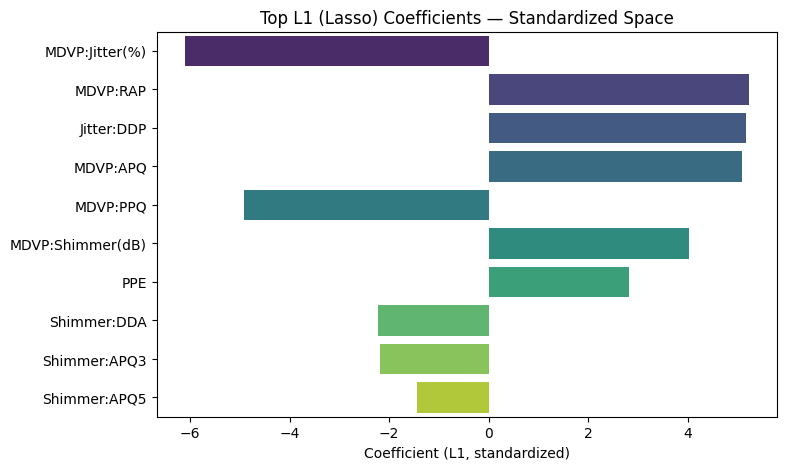

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

X = df[num_cols].copy()
y = df["status"]
data_rl = pd.concat([X, y], axis=1).dropna()
X = data_rl[num_cols].values
y = data_rl["status"].values

# Common pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, solver="liblinear", penalty="l1"))  # L1 first
])

param_grid = {"clf__C": np.logspace(-3, 3, 13)}  # C is inverse of regularization strength
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# LASSO
gs_l1 = GridSearchCV(pipe, param_grid, cv=cv, scoring="roc_auc", n_jobs=-1)
gs_l1.fit(X, y)
best_l1 = gs_l1.best_estimator_
coefs_l1 = best_l1.named_steps["clf"].coef_.ravel()

# RIDGE (change penalty)
pipe_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, solver="liblinear", penalty="l2"))
])
gs_l2 = GridSearchCV(pipe_ridge, param_grid, cv=cv, scoring="roc_auc", n_jobs=-1)
gs_l2.fit(X, y)
best_l2 = gs_l2.best_estimator_
coefs_l2 = best_l2.named_steps["clf"].coef_.ravel()

# Collect coefficients into a table
coef_df = pd.DataFrame({
    "feature": num_cols,
    "coef_L1": coefs_l1,
    "coef_L2": coefs_l2
}).sort_values("coef_L1", key=lambda s: np.abs(s), ascending=False)

print(f"Best L1 AUC: {gs_l1.best_score_:.3f}  (C={gs_l1.best_params_['clf__C']})")
print(f"Best L2 AUC: {gs_l2.best_score_:.3f}  (C={gs_l2.best_params_['clf__C']})")
display(coef_df.head(15))

# Quick bar plot of top L1 absolute coefficients
top_k = 10
coef_df_top = coef_df.reindex(coef_df["coef_L1"].abs().sort_values(ascending=False).index).head(top_k)

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df_top, x="coef_L1", y="feature", orient="h", palette="viridis")
plt.title("Top L1 (Lasso) Coefficients — Standardized Space")
plt.xlabel("Coefficient (L1, standardized)")
plt.ylabel("")
plt.show()
